In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import streamlit as st

raw_df = pd.read_csv("high_popularity_spotify_data.csv", encoding = "UTF-8")
raw_df

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4,0.0358,...,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4,0.0368,...,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4,0.0634,...,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,...,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.5510,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,...,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.4240,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,...,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.1820,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,...,0.000000,6tE9Dnp2zInFij4jKssysL,1,1,189893,0.3140,59nOXPmaKlBfGMDeOVGrIK,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh


In [2]:
#checking missing data
raw_df.isnull().sum()

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            1
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
dtype: int64

In [3]:
#dropping the one missing value row as it is not crucial for my work
raw_df.dropna(subset=["track_album_name"], inplace = True)

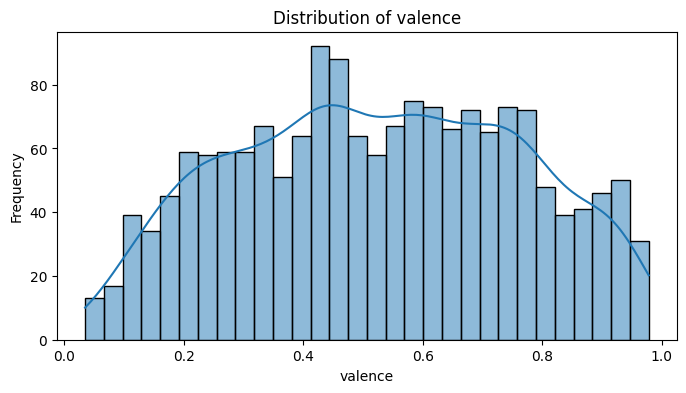

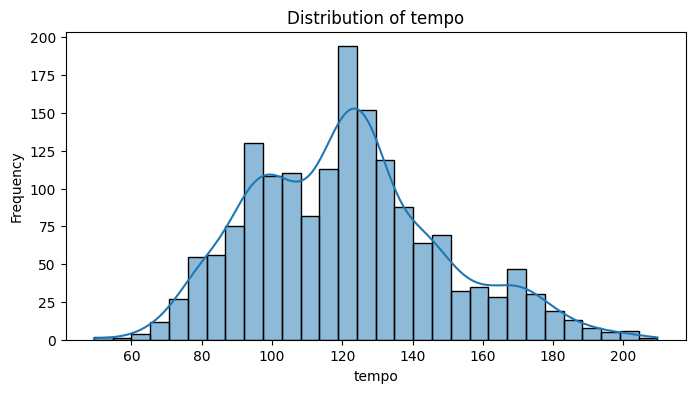

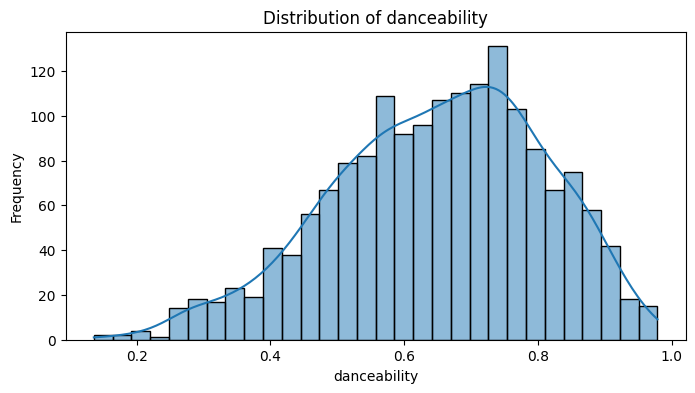

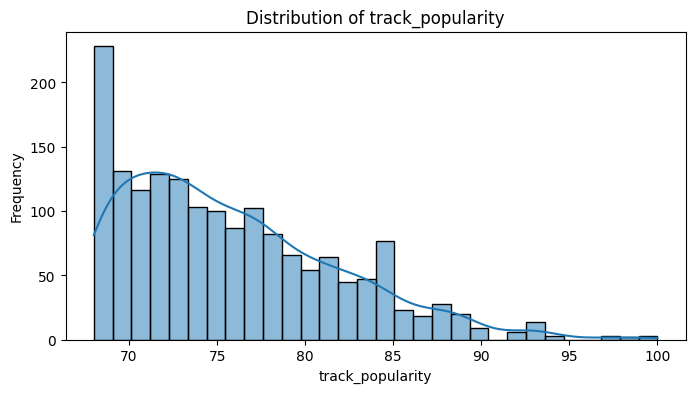

In [4]:
# List of numerical features to visualize
features = ['valence', 'tempo', 'danceability', 'track_popularity']

# Create histograms for each feature
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(raw_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

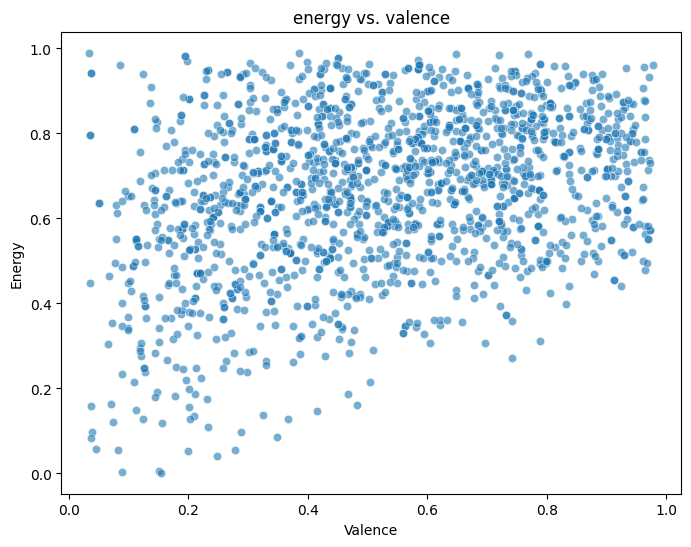

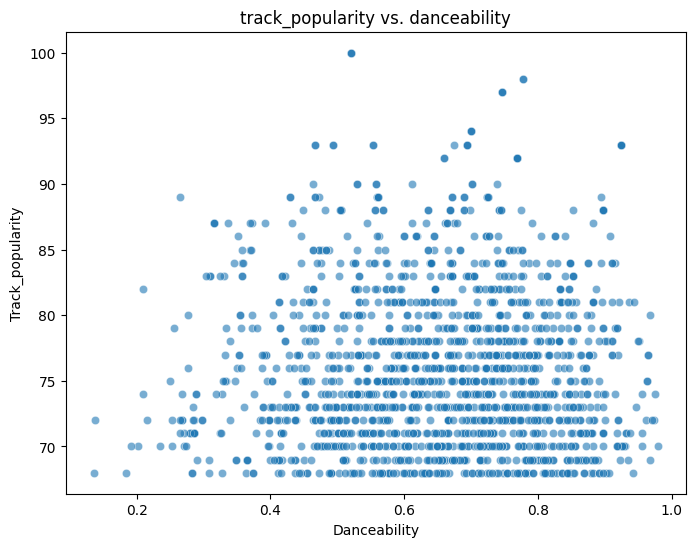

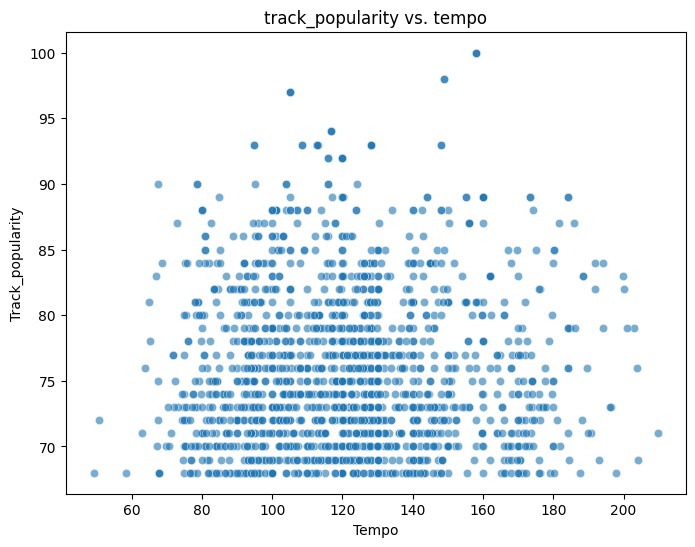

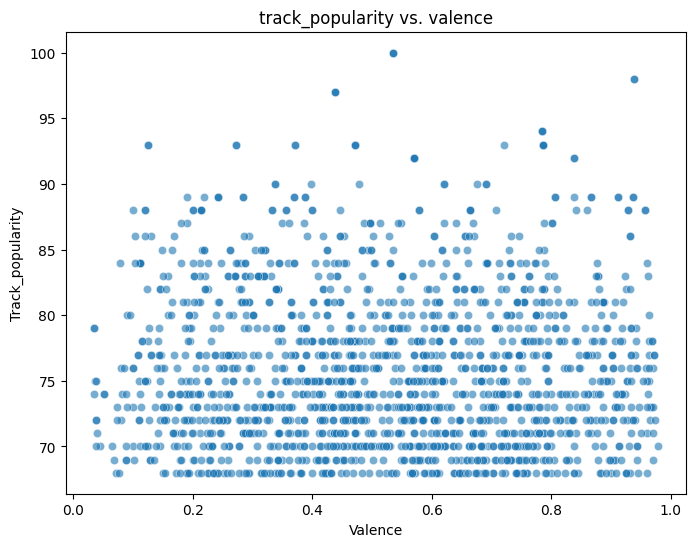

In [5]:
feature_pairs = [
    ('valence', 'energy'),
    ('danceability', 'track_popularity'),
    ('tempo', 'track_popularity'),
    ('valence', 'track_popularity')
]

for x, y in feature_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=raw_df, x=x, y=y, alpha=0.6)
    plt.title(f'{y} vs. {x}')
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.show()


In [6]:
numeric_df = raw_df.select_dtypes(include = ["float64","int64"])

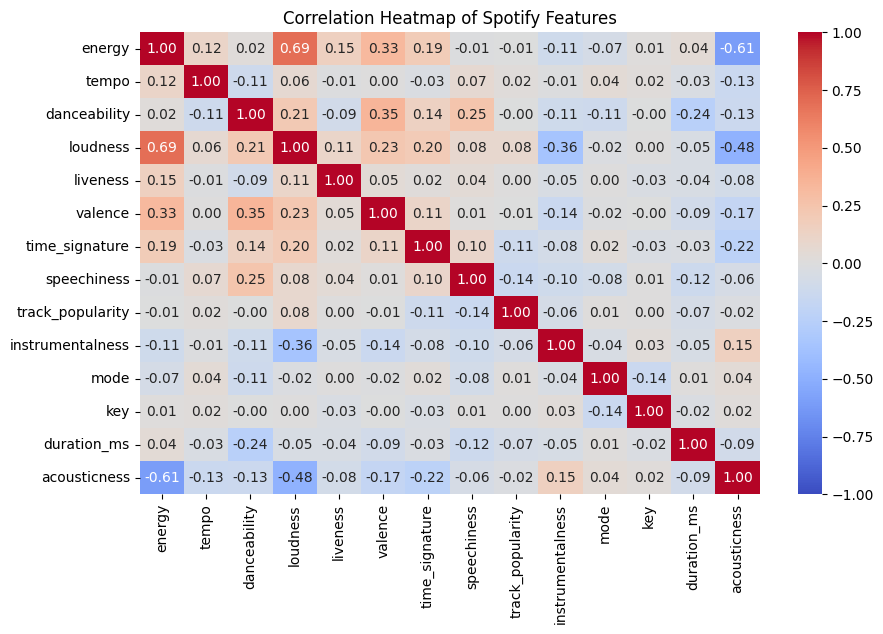

In [7]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Spotify Features")
plt.show()

In [8]:
# Define the mood classification function
def mood_category(row):
    if row['valence'] > 0.5 and row['energy'] > 0.5:
        return "Happy Energetic"
    elif row['valence'] > 0.5 and row['energy'] <= 0.5:
        return "Calm Happy"
    elif row['valence'] <= 0.5 and row['energy'] > 0.5:
        return "Intense"
    else:
        return "Sad"

# Apply the function to the dataset
raw_df['mood'] = raw_df.apply(mood_category, axis=1)

raw_df[['valence', 'energy', 'mood']].head()


,valence,energy,mood
0,0.535,0.592,Happy Energetic
1,0.438,0.507,Intense
2,0.372,0.808,Intense
3,0.786,0.910,Happy Energetic
4,0.939,0.783,Happy Energetic


In [9]:
raw_df["mood"].value_counts()

mood
Happy Energetic    807
Intense            580
Sad                216
Calm Happy          82
Name: count, dtype: int64

In [10]:
# Create a feature that combines acousticness and loudness
raw_df['acoustic_loudness'] = raw_df['acousticness'] * (-raw_df['loudness'])

raw_df[['acousticness', 'loudness', 'acoustic_loudness']].head()


,acousticness,loudness,acoustic_loudness
0,0.3080,-7.777,2.395316
1,0.2000,-10.171,2.034200
2,0.2140,-4.169,0.892166
3,0.0939,-4.070,0.382173
4,0.0283,-4.477,0.126699


In [11]:
#normalising song duration column/feature
raw_df["duration_min"] = raw_df["duration_ms"]/60000
raw_df[['duration_ms', 'duration_min']].head()

,duration_ms,duration_min
0,251668,4.194467
1,210373,3.506217
2,166300,2.771667
3,157280,2.621333
4,169917,2.831950


In [12]:
# Define the scaler
scaler = MinMaxScaler()

# List of features to normalize
features_to_normalize = ['tempo', 'energy', 'danceability']

# Apply scaling
raw_df[features_to_normalize] = scaler.fit_transform(raw_df[features_to_normalize])

raw_df[features_to_normalize].head()


,tempo,energy,danceability
0,0.677528,0.597325,0.456702
1,0.347125,0.511327,0.724792
2,0.369385,0.815862,0.495848
3,0.396931,0.919060,0.633452
4,0.621774,0.790569,0.760380


In [13]:

# Define the features and target
X = raw_df[['valence', 'energy', 'danceability', 'tempo', 'acoustic_loudness']]  # Feature columns
y = raw_df['mood']  # Target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (1348, 5), (1348,)
Testing set shape: (337, 5), (337,)


In [16]:
# Function to recommend songs based on user preferences
def recommend_songs(user_preferences, data, top_n=5):
    # Compute cosine similarity between user preferences and dataset features
    similarity_scores = cosine_similarity([user_preferences], data)[0]
    
    # Rank songs by similarity scores
    top_indices = np.argsort(similarity_scores)[::-1][:top_n]
    
    # Return the top N recommendations
    return raw_df.iloc[top_indices][['track_name', 'track_artist', 'mood','track_href']]
    

# Streamlit app starts here
st.title("Spotify Music Recommendation System")

# Streamlit sidebar inputs
st.sidebar.header("User Preferences")
valence = st.sidebar.slider("Valence (Happiness)", 0.0, 1.0, 0.5)
energy = st.sidebar.slider("Energy (Liveliness)", 0.0, 1.0, 0.5)
danceability = st.sidebar.slider("Danceability", 0.0, 1.0, 0.5)
tempo = st.sidebar.slider("Tempo", 0.0, 1.0, 0.5)
acoustic_loudness = st.sidebar.slider("Acoustic-Loudness Interaction", 0.0, 1.0, 0.5)

user_preferences = [valence, energy, danceability, tempo, acoustic_loudness]

# Generate recommendations
recommendations = recommend_songs(
    user_preferences, 
    raw_df[['valence', 'energy', 'danceability', 'tempo', 'acoustic_loudness']].values
)

# Display recommendations
st.subheader("Recommended Songs")
for index, row in recommendations.iterrows():
    st.write(f"🎵 **{row['track_name']}** by {row['track_artist']} ({row['mood']})")
    st.write(f"[Listen on Spotify]({row['track_href']})")
if __name__ == "__main__":
    import streamlit as st

2025-01-20 20:10:49.062 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 20:10:49.111 
  command:

    streamlit run C:\Users\Solent\anaconda3\envs\MelodyMatch\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-20 20:10:49.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 20:10:49.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 20:10:49.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 20:10:49.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 20:10:49.115 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 20:10:49.115 Threa